In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import h5py
import numpy as np
# import pandas as pd
# import seaborn as sns
import matplotlib.pyplot as plt
# from tqdm import tqdm

In [1]:
# os.environ['LD_LIBRARY_PATH']=os.environ['LD_LIBRARY_PATH'] + ':' + os.environ['CONDA_PREFIX'] + '/lib'

In [3]:
PROJECT_PATH = '../'
import sys
sys.path.insert(0, PROJECT_PATH)

In [4]:
os.environ["CUDA_VISIBLE_DEVICES"] = "3"

In [5]:
import tensorflow as tf

In [6]:
tf.__version__

'2.8.0'

In [7]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  3


In [8]:
tf.config.list_physical_devices('GPU') 

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:2', device_type='GPU')]

In [74]:
from PIML.nn.evalboxW import  EvalBoxW

In [75]:
d = EvalBoxW()

In [76]:
W="RedM"; Rs=["R"]; Res=5000;step=10;
d.init_box(W,Rs, Res,step, topk=10, onPCA=1, load_eigv=1)

INFO:root:=============================PREPARING R=====================
INFO:root:#220 R=1000.00
INFO:root:Top #220 eigs [105.32   7.07   5.2    1.44   1.21   0.76   0.57   0.49   0.35   0.28]


sky_H (2204,)
Building RBF with gaussan kernel on data shape (2880,)
Building RBF with gaussan kernel on data shape (2880, 220)


INFO:root:error: 2.129412503659851e-07


In [77]:
# train
mtype="NzDNN";train_NL=30;nTrain=1000;name="";
d.init_test(topk=10,mtype=mtype, train_NL=train_NL, nTrain=nTrain, save=1, name=name)

In [78]:
batch=128;nEpoch=30;
d.run(lr=0.03, dp=0.02, batch=batch, nEpoch=nEpoch, verbose=1)

INFO:root:Tensorboard log path: /home/swei20/PhysicsInformedML/logs/R_ep30__nzD_nl30_lr003_I60_h4_O3_dp002_06_1736
INFO:root:R_ep30__nzD_nl30_lr003_I60_h4_O3_dp002_06_1736


Layers: [60, 128, 64, 32, 16, 3]
Epoch 1/30
6/6 [==============================] - 2s 109ms/step - loss: 0.8011 - mean_squared_error: 0.8011 - val_loss: 153.2698 - val_mean_squared_error: 153.2698 - lr: 0.0300
Epoch 2/30
6/6 [==============================] - 0s 72ms/step - loss: 0.3426 - mean_squared_error: 0.3426 - val_loss: 178.0482 - val_mean_squared_error: 178.0482 - lr: 0.0300
Epoch 3/30
6/6 [==============================] - 0s 77ms/step - loss: 0.1429 - mean_squared_error: 0.1429 - val_loss: 103.1848 - val_mean_squared_error: 103.1848 - lr: 0.0300
Epoch 4/30
6/6 [==============================] - 0s 67ms/step - loss: 0.0501 - mean_squared_error: 0.0501 - val_loss: 45.1290 - val_mean_squared_error: 45.1290 - lr: 0.0300
Epoch 5/30
6/6 [==============================] - 0s 62ms/step - loss: 0.0220 - mean_squared_error: 0.0220 - val_loss: 16.6277 - val_mean_squared_error: 16.6277 - lr: 0.0300
Epoch 6/30
6/6 [==============================] - 0s 71ms/step - loss: 0.0164 - mean_squar

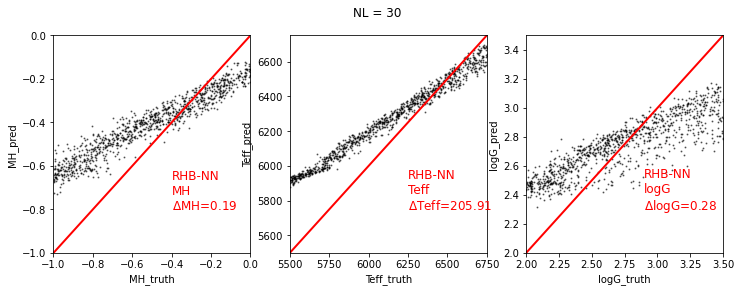

In [81]:
d.test(test_NL=30, nTest=1000, new=True)

In [57]:
# ms = ["R_ep1000_nzD_nl10_lr003_I60_h4_O3_dp002_30_1418"]
# ms="R_ep1000_nzD_nl10_lr20_I60_h4_O3_dp002_29_2347"
# ms = "R_ep300_BN_nzD_nl30_lr003_I60_h4_O3_dp002_02_2130"
ms="R_ep300_BN_nzD_nl30_lr003_I60_h4_O3_dp002_06_1247"

In [58]:
d.init_test(model_names=ms, topk=10)

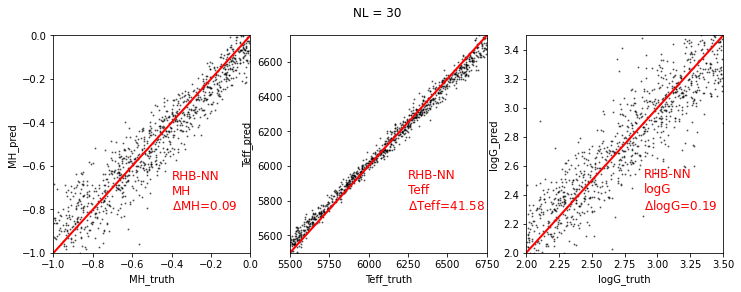

In [60]:
d.test(test_NL=30, nTest=1000, new=True)

In [47]:
# ms = ["R_ep1000_nzD_nl10_lr003_I60_h4_O3_dp002_30_1418"]
# ms="R_ep1000_nzD_nl10_lr20_I60_h4_O3_dp002_29_2347"
# ms = "R_ep300_BN_nzD_nl30_lr003_I60_h4_O3_dp002_02_2130"
ms="R_ep300_BN_nzD_nl30_lr003_I60_h4_O3_dp002_02_2130"

In [53]:
d.init_test(model_names=ms, topk=10)

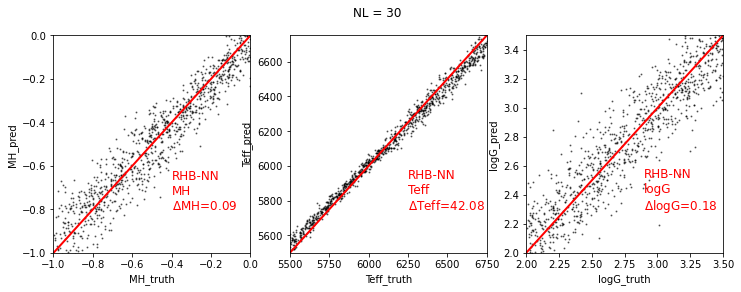

In [56]:
d.test(test_NL=30, nTest=1000, new=True)

In [31]:
d.p_pred

{'R': {'R': array([[7.47917366e+00, 2.48728948e+04, 1.22191234e+01],
         [5.75154018e+00, 2.21203153e+04, 1.18024447e+01],
         [6.60016251e+00, 2.18972199e+04, 1.07690790e+01],
         ...,
         [7.42537498e+00, 2.48899679e+04, 9.82280779e+00],
         [6.41146898e+00, 2.53538470e+04, 1.37325938e+01],
         [6.12014103e+00, 2.27600186e+04, 1.10786166e+01]])}}

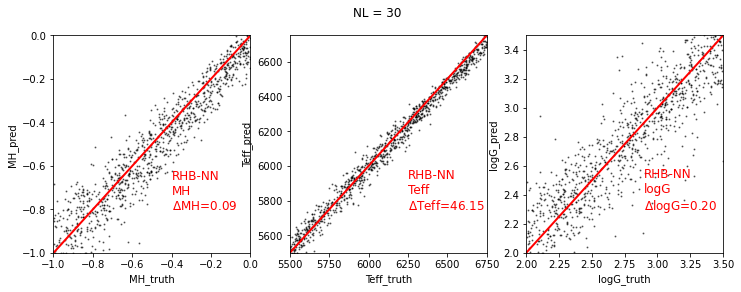

In [32]:
d.test(test_NL=30, nTest=1000, new=True)

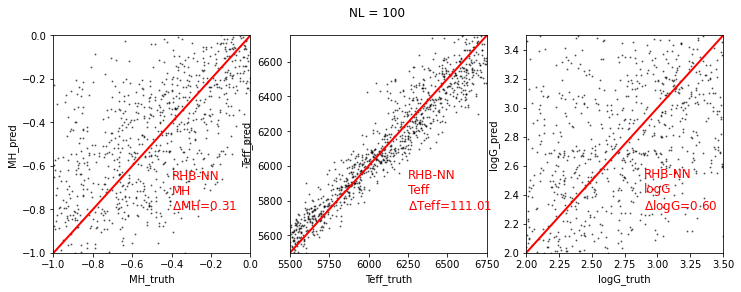

In [28]:
d.test(test_NL=100, nTest=1000, new=True)

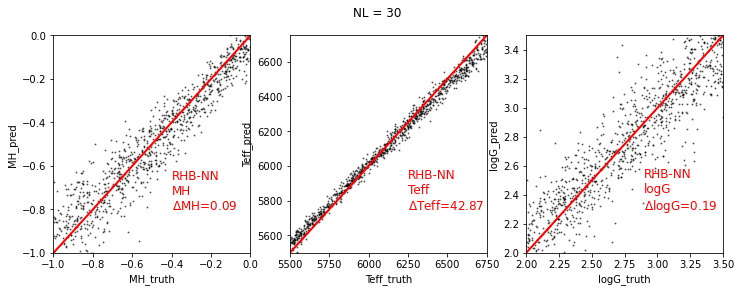

In [27]:
d.test(test_NL=30, nTest=1000, new=True)

In [144]:
R0="R"
axis=1
pmt0 = d.DPhyMid[R0]
tmin = d.pMins[R0][axis]
tmax = d.pMaxs[R0][axis]

In [145]:
pmt1 = np.copy(pmt0)
pmt1[axis] = tmin

In [146]:
pmt2 = np.copy(pmt0)
pmt2[axis] = tmax

In [147]:
pmt1, pmt2

(array([-5.0e-01,  5.5e+03,  2.5e+00, -2.5e-01,  0.0e+00]),
 array([-5.00e-01,  6.75e+03,  2.50e+00, -2.50e-01,  0.00e+00]))

In [148]:
ak = d.DRbf_ak[R0](pmt0)

In [149]:
ak1 = d.DRbf_ak[R0](pmt1)
ak2 = d.DRbf_ak[R0](pmt2)

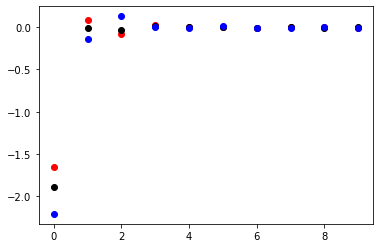

In [150]:
plt.plot(ak1,'ro')
plt.plot(ak, 'ko')
plt.plot(ak2, 'bo')

In [151]:
nn = d.nn[R0]

In [152]:
nTrj = 10
axTrj =0
akks = np.tile(akk, (10,1))
mmin =d.x_test[R0].min(0)[axTrj]
mmax = d.x_test[R0].max(0)[axTrj]
# thetas = np.linspace(ak1[axTrj],ak2[axTrj],nTrj)
thetas = np.linspace(mmin, mmax,nTrj)

In [153]:
akks[:,axTrj] = thetas

In [154]:
model = d.DRbf_flux[R0](pmt0,log=1, dotA=0)

In [155]:
akk = model.dot(d.eigv.T)

In [156]:
d.p_pred[R0][R0]

array([[-8.38737935e-01,  5.93596968e+03,  3.43902463e+00],
       [-8.32823128e-01,  6.13013360e+03,  2.93741801e+00],
       [-3.88438642e-01,  6.11964318e+03,  3.21377110e+00],
       ...,
       [-9.15149212e-01,  6.54275301e+03,  2.93748498e+00],
       [-3.67368579e-01,  6.05714313e+03,  2.90964597e+00],
       [-4.16580081e-01,  6.62878308e+03,  2.21525872e+00]])

In [157]:
p_preds =nn._predict(akks)

In [162]:
p_preds

array([[-4.54223692e-01,  6.06902744e+03,  2.63026623e+00],
       [-4.71847117e-01,  6.05381440e+03,  2.60177898e+00],
       [-4.91092205e-01,  6.03764470e+03,  2.56820327e+00],
       [-5.07479042e-01,  6.02435055e+03,  2.54515974e+00],
       [-5.21435618e-01,  6.01136803e+03,  2.52235480e+00],
       [-5.33957541e-01,  5.99844280e+03,  2.49983260e+00],
       [-5.47102839e-01,  5.99048424e+03,  2.47921178e+00],
       [-5.70379972e-01,  5.98166253e+03,  2.45668073e+00],
       [-5.91096163e-01,  5.97228459e+03,  2.43467396e+00],
       [-6.07461751e-01,  5.96197712e+03,  2.41324160e+00]])

In [161]:
d.eigv.shape

(60, 220)

[-0.45422369 -0.47184712 -0.49109221 -0.50747904 -0.52143562 -0.53395754
 -0.54710284 -0.57037997 -0.59109616 -0.60746175] [6069.02743876 6053.81439626 6037.64469922 6024.35055375 6011.36802882
 5998.44279885 5990.48423767 5981.66252673 5972.28459269 5961.97712421]
[6069.02743876 6053.81439626 6037.64469922 6024.35055375 6011.36802882
 5998.44279885 5990.48423767 5981.66252673 5972.28459269 5961.97712421] [2.63026623 2.60177898 2.56820327 2.54515974 2.5223548  2.4998326
 2.47921178 2.45668073 2.43467396 2.4132416 ]
[2.63026623 2.60177898 2.56820327 2.54515974 2.5223548  2.4998326
 2.47921178 2.45668073 2.43467396 2.4132416 ] [-0.45422369 -0.47184712 -0.49109221 -0.50747904 -0.52143562 -0.53395754
 -0.54710284 -0.57037997 -0.59109616 -0.60746175]


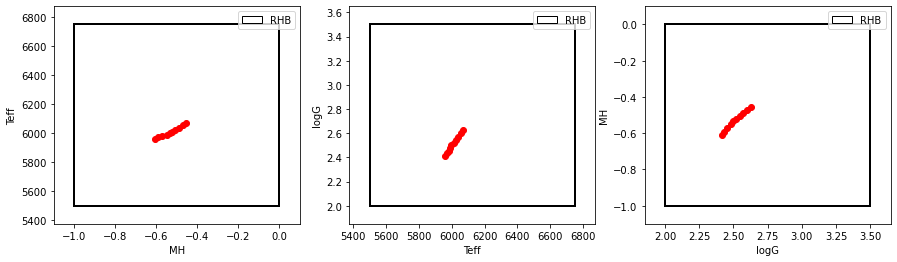

In [159]:
d.eval_traj(R0, p_preds)

In [127]:
d.p_pred[R0][R0].shape

(1000, 3)

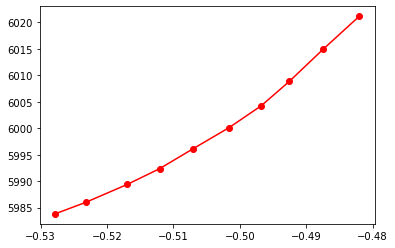

In [108]:
plt.plot(*p_preds[:,:2].T, "o-", c="r")


In [76]:
d.eval_box(p_preds)

AttributeError: 'numpy.ndarray' object has no attribute 'keys'

In [27]:
ak

array([-1.89189589e+00, -1.29541130e-02, -3.72722472e-02,  1.01674931e-02,
        1.65208172e-03, -3.71346772e-03, -1.13098203e-02,  1.05191238e-03,
       -6.76999511e-03,  9.55919932e-04])

In [ ]:
ak

In [ ]:
ak0 = 

In [4]:
from PIML.nn.dnn.dnnboxW import DnnBoxW

2022-01-30 12:51:27.510281: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set


In [5]:
d = DnnBoxW()

In [7]:
W="RedM"; Rs=["R"]; Res=5000;step=10;
d.init_box(W,Rs, Res,step, topk=10, onPCA=1, load_eigv=1)

INFO:root:=============================PREPARING R=====================


#220 R=1000.00
sky_H (2204,)


INFO:root:Top eigs [105.32   7.07   5.2    1.44   1.21   0.76   0.57   0.49   0.35   0.28]


Building RBF with gaussan kernel on data shape (2880,)
Building RBF with gaussan kernel on data shape (2880, 10)


INFO:root:error: 1.7844823053258816e-08


In [11]:
d.init_train(out_idx=[0,1,2], mtype="NzDNN", train_NL=2, nTrain=1024, log=1)

INFO:root:Tensorboard log path: /home/swei20/PhysicsInformedML/logs/R_ep2_nzD_nl2_lr20_I60_h4_O3_dp002_30_1308
2022-01-30 13:08:25.214530: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-01-30 13:08:25.214570: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-01-30 13:08:25.214607: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
INFO:root:R_ep2_nzD_nl2_lr20_I60_h4_O3_dp002_30_1308


Layers: [60, 128, 64, 32, 16, 3]


INFO:root:generating (1024, 60) training data for RHB


Epoch 1/2
1/1 [==============================] - 1s 887ms/step - loss: 0.3082 - mean_squared_error: 0.3082
Epoch 2/2
1/1 [==============================] - ETA: 0s - loss: 0.4098 - mean_squared_error: 0.4098

2022-01-30 13:08:26.835283: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-01-30 13:08:26.835599: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.


1/1 [==============================] - 0s 261ms/step - loss: 0.4098 - mean_squared_error: 0.4098
saving model to:  /home/swei20/PhysicsInformedML/models/R_ep2_nzD_nl2_lr20_I60_h4_O3_dp002_30_1308/model.h5


2022-01-30 13:08:27.037447: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2022-01-30 13:08:27.041659: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2022-01-30 13:08:27.049386: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /home/swei20/PhysicsInformedML/logs/train/plugins/profile/2022_01_30_13_08_27
2022-01-30 13:08:27.052488: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to /home/swei20/PhysicsInformedML/logs/train/plugins/profile/2022_01_30_13_08_27/volta03.idies.jhu.edu.trace.json.gz
2022-01-30 13:08:27.079462: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /home/swei20/PhysicsInformedML/logs/train/plugins/profile/2022_01_30_13_08_27
2022-01-30 13:08:27.088284: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for memory_profile.json.gz to /home/swei20

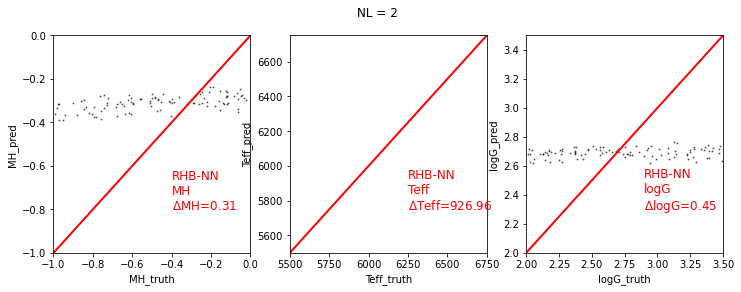

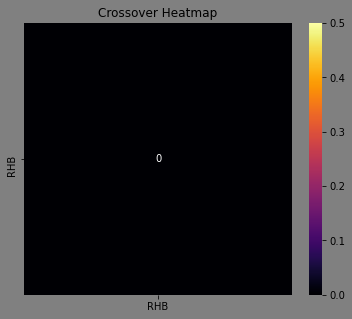

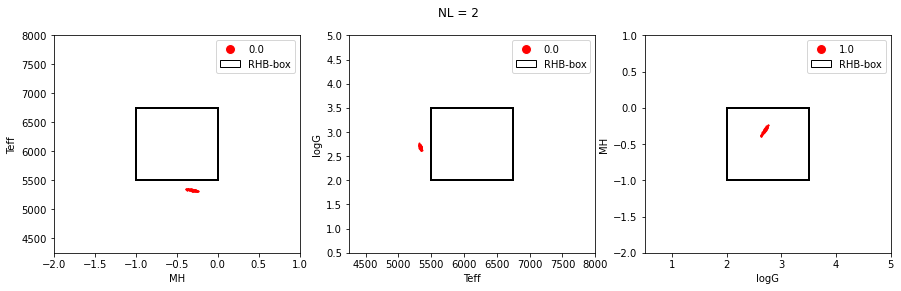

In [16]:
d.run(lr=0.01, dp=0.02, batch=512, nEpoch=2, verbose=1)

In [581]:
d.get_random_pmt = lambda x: b.get_random_pmt(x, nPara=5, method="halton")

100%|██████████| 10/10 [00:01<00:00,  6.89it/s]


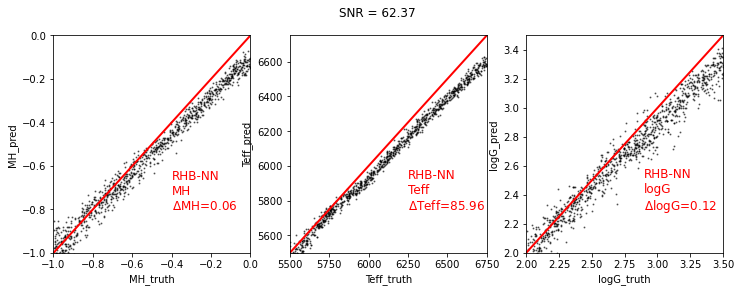

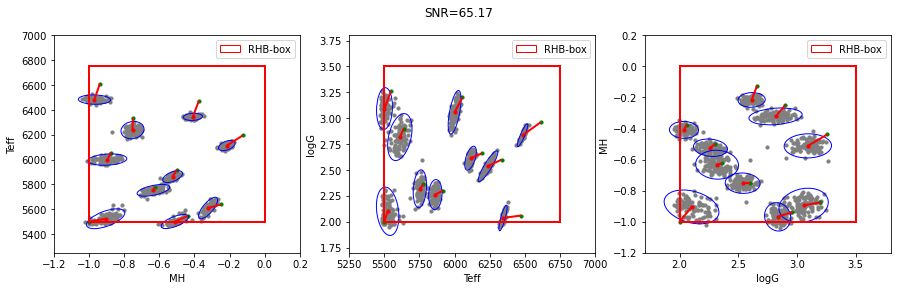

In [582]:
d.init_eval()

AttributeError: 'BoxWR' object has no attribute 'get_random_pmt_R'

100%|██████████| 10/10 [00:01<00:00,  7.27it/s]


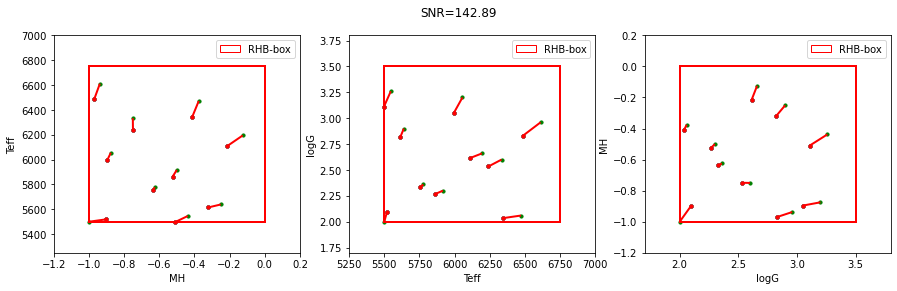

In [585]:
np.random.seed(926)
pmts = b.get_random_pmt(10)
d.eval_pmts_noise(pmts, 1, 100, 0.2)

In [319]:
train_pmts.shape

(100000, 5)

In [320]:
d.y_train

array([[0.        , 0.        , 0.        ],
       [0.5       , 0.33333333, 0.2       ],
       [0.25      , 0.66666667, 0.4       ],
       ...,
       [0.72414398, 0.61000751, 0.59975936],
       [0.47414398, 0.94334084, 0.79975936],
       [0.97414398, 0.09148899, 0.99975936]])

In [321]:
DG = DataGenerator(aks_train,std_train, train_pmts[:, d.odx], eigv=d.eigv, noise_level=1, batch_size=5, shuffle=False)

In [331]:
d.dnn.model.fit(DG, validation_data=DG)

6/6 [==============================] - 1s 92ms/step - loss: 12380998.0000 - mean_squared_error: 12380998.0000 - val_loss: 12371947.0000 - val_mean_squared_error: 12371947.0000


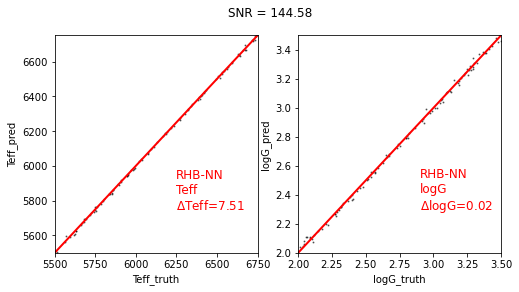

In [370]:
d.eval(snr = b.estimate_snr(NL))

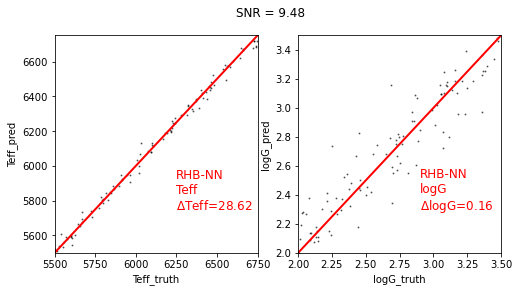

In [378]:
d.eval(snr = b.estimate_snr(NL))

In [ ]:
NL=100
bk_fns_10k, bks_10k = b.get_bk_fns(NL, pmts = train_pmts, out_bks=1)
bk_fns_1k, bks_1k = b.get_bk_fns(NL, pmts = test_pmts, out_bks=1)

In [382]:
bk_N_obs = b.get_bks_N_obs_from_pmt(noise_level=NL, pmt=b.PhyMid, N_obs=100)

In [391]:
b.PhyMid[d.odx]

array([6.0e+03, 2.5e+00])

In [395]:
d.eval_pmt_noise(bk_N_obs, b.PhyMid, 100)

(100, 2)
(100, 2)


TypeError: plot_box() missing 1 required positional argument: 'pdxs'

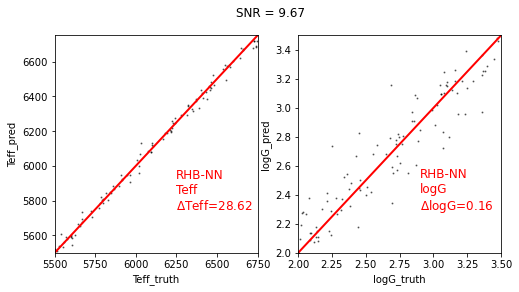

In [409]:
d.init_eval(NL, b.estimate_snr, b.get_bks_N_obs_from_pmt)

100%|██████████| 10/10 [00:01<00:00,  5.81it/s]


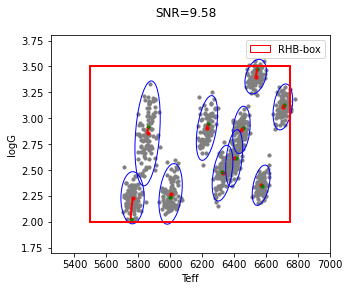

In [424]:
np.random.seed(926)
pmts = b.get_random_pmt(10)
d.eval_pmts_noise(pmts, NL, 100, 0.2)

100%|██████████| 10/10 [00:01<00:00,  5.05it/s]


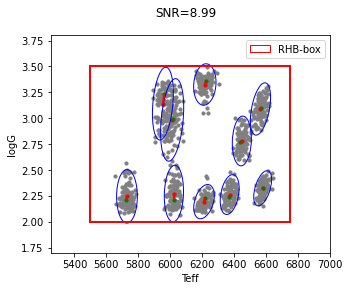

In [419]:
np.random.seed(1015)
pmts = b.get_random_pmt(10)
d.eval_pmts_noise(test_pmts[:10], NL, 100, 0.2)

100%|██████████| 10/10 [00:01<00:00,  7.95it/s]


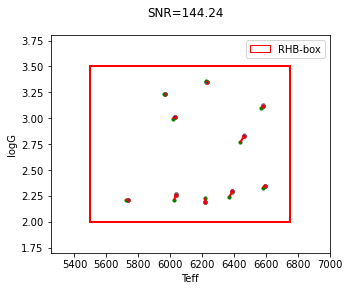

In [418]:
d.eval_pmts_noise(test_pmts[:10], 1, 10, 0.2)

In [407]:
preds

array([[5.93780401e+03, 2.49332368e+00],
       [6.03775650e+03, 2.57310952e+00],
       [5.98682369e+03, 2.56321526e+00],
       [6.05845223e+03, 2.55700625e+00],
       [5.96359144e+03, 2.67684199e+00],
       [5.95436975e+03, 2.30935119e+00],
       [6.02049469e+03, 2.90595248e+00],
       [5.99716830e+03, 2.22376805e+00],
       [6.03746711e+03, 2.37784439e+00],
       [5.99777813e+03, 2.34425741e+00]])

In [ ]:
# d.run(lr=0.01, dp=0.2, nEpoch=100, verbose=0)